<a href="https://colab.research.google.com/github/mrcrdg/jupyter_set/blob/master/ROC_Curves_and_AUC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ROC Curves

Toy example: 

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

Generate some data with some probabilities

In [ ]:
y = np.array([1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2])
scores = np.array([0.1, 0.1, 0.2, 0.3, 0.4, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
fpr, tpr, thresholds = roc_curve(y, scores, pos_label=2)
roc_auc = roc_auc_score(y, scores)
print("AUC: {}".format(roc_auc))

AUC: 0.7857142857142858


Plot the ROC curve

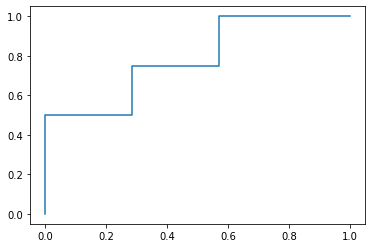

In [ ]:
plt.figure()
plt.plot(fpr, tpr)

## A more real example

First do the needed imports

In [ ]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

Let's generate some data

In [ ]:
# generate 2 class dataset
X, Y = make_classification(n_samples=1000, n_features=5, n_classes=2, 
                           random_state=1)

Inspect the generated clasification problem

In [ ]:
X[:5]

array([[-1.39087601,  0.62478042,  3.4809096 ,  2.3823372 ,  0.38622388],
       [-0.48529475,  0.30051483,  1.33915253,  0.84620081,  1.17745439],
       [-0.73504687,  0.13412273,  1.54350554,  1.22343943, -0.62879943],
       [ 0.6594484 ,  1.47747999,  1.0281535 , -0.80770875, -0.34350003],
       [ 0.17288184,  0.99271923,  1.18375139, -0.10191134,  0.08911753]])

In [ ]:
Y[:10]

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0])

Now we will split the data into train and test:

In [ ]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.5, 
                                                random_state=2)

Let's train a Logistic Regression Model

In [ ]:
# fit a model
model = LogisticRegression()
model.fit(trainX, trainY)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Now we need to evaluate the model on the test Data.

In [ ]:
pred_prob = model.predict_proba(testX)

We are going to keep only the positive outcome

In [ ]:
pred_prob = pred_prob[:,1]

Calculate the AUC score:

In [ ]:
auc = roc_auc_score(testY, pred_prob)
print("AUC score: {:.3f}".format(auc))

AUC score: 0.934


Let's calculate the ROC curve parameters:

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(testY, 
                                                                pred_prob)

In [ ]:
thresholds

array([1.99908406e+00, 9.99084055e-01, 9.57352912e-01, 9.56858653e-01,
       9.22318086e-01, 9.22033477e-01, 9.10108838e-01, 9.08405345e-01,
       8.86861981e-01, 8.86484147e-01, 8.85071397e-01, 8.83524086e-01,
       8.46080635e-01, 8.44828861e-01, 8.33978603e-01, 8.30958702e-01,
       8.12248239e-01, 8.12149104e-01, 7.98410990e-01, 7.98339264e-01,
       7.77237346e-01, 7.74813814e-01, 7.67204554e-01, 7.61994279e-01,
       7.26183768e-01, 7.26070252e-01, 7.20544680e-01, 7.17619830e-01,
       6.81943633e-01, 6.79844992e-01, 6.68820045e-01, 6.62512323e-01,
       6.49650133e-01, 6.39874271e-01, 6.36939202e-01, 6.36500750e-01,
       6.24258500e-01, 6.23801996e-01, 5.95035817e-01, 5.90411214e-01,
       5.63198784e-01, 5.62913555e-01, 5.01094978e-01, 4.89883619e-01,
       4.85615535e-01, 4.77044290e-01, 4.61820824e-01, 4.37522669e-01,
       4.35191800e-01, 4.29798204e-01, 4.26126764e-01, 4.21353424e-01,
       4.06040960e-01, 3.97777828e-01, 3.95993550e-01, 3.84623522e-01,
      

Now we plot the curve:

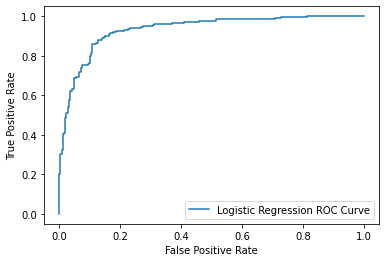

In [ ]:
pyplot.plot(false_positive_rate, true_positive_rate, 
            label='Logistic Regression ROC Curve')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Exercise

The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

### Download and read the data:

In [ ]:
!pip install gdown

In [ ]:
!gdown https://drive.google.com/uc?id=1AjsJi7hWN1jfNuqb2wFbFtQUGBbt0xe7

Downloading...
From: https://drive.google.com/uc?id=1AjsJi7hWN1jfNuqb2wFbFtQUGBbt0xe7
To: /content/framingham.csv
100% 196k/196k [00:00<00:00, 69.0MB/s]


In [ ]:
!head -10 framingham.csv

male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,39,4,0,0,0,0,0,0,195,106,70,26.97,80,77,0
0,46,2,0,0,0,0,0,0,250,121,81,28.73,95,76,0
1,48,1,1,20,0,0,0,0,245,127.5,80,25.34,75,70,0
0,61,3,1,30,0,0,1,0,225,150,95,28.58,65,103,1
0,46,3,1,23,0,0,0,0,285,130,84,23.1,85,85,0
0,43,2,0,0,0,0,1,0,228,180,110,30.3,77,99,0
0,63,1,0,0,0,0,0,0,205,138,71,33.11,60,85,1
0,45,2,1,20,0,0,0,0,313,100,71,21.68,79,78,0
1,52,1,0,0,0,0,1,0,260,141.5,89,26.36,76,79,0


Read the data using Pandas

In [ ]:
import pandas as pd

In [ ]:
heart_df=pd.read_csv("framingham.csv")

In [ ]:
heart_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Tasks

1. Explore the data and build a Logistic Regression classifier to predict the `TenYearCHD` variable. 
1. Try a combination of variables in order to build the best classifier.
1. Build ROC curves and calculate the AUC to compare the classifiers.
1. Compare with Naive Bayes classifiers